<a href="https://colab.research.google.com/github/loukhyar/Stock-Market-Trend-Predictor/blob/main/Stock_Market_Trend_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn yfinance


In [ ]:
import yfinance as yf
import pandas as pd

# Download Tesla's stock data
stock = yf.download('TSLA', start='2018-01-01', end='2025-01-01')

# Display the first few rows
print(stock.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2018-01-02  21.368668  21.474001  20.733334  20.799999   65283000
2018-01-03  21.150000  21.683332  21.036667  21.400000   67822500
2018-01-04  20.974667  21.236668  20.378668  20.858000  149194500
2018-01-05  21.105333  21.149332  20.799999  21.108000   68868000
2018-01-08  22.427334  22.468000  21.033333  21.066668  147891000


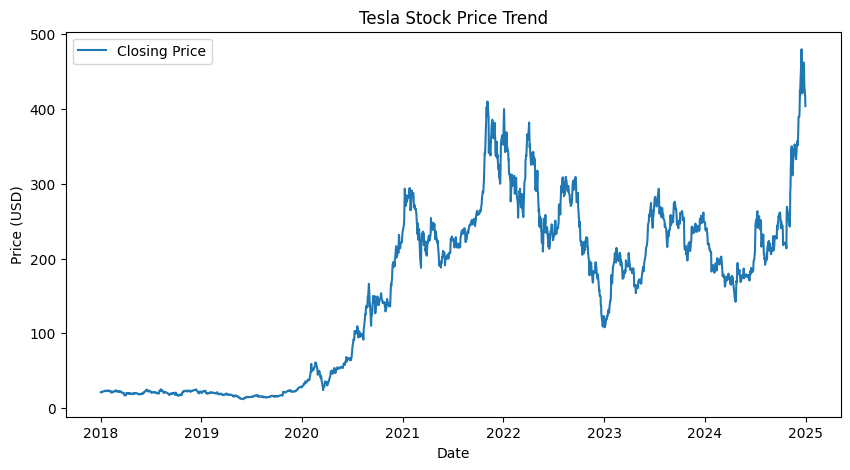

In [ ]:
import matplotlib.pyplot as plt

# Plot Tesla's closing prices
plt.figure(figsize=(10, 5))
plt.plot(stock['Close'], label="Closing Price")
plt.title("Tesla Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [ ]:
#Preparing Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a "Future Price" column (next 5 days)
stock['Future Price'] = stock['Close'].shift(-5)

# Drop rows with NaN values
stock.dropna(inplace=True)

# Define features (X) and target variable (y)
X = stock[['Close']]
y = stock['Future Price']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future prices on test data
predicted_prices = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_prices)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 10.36
Root Mean Squared Error (RMSE): 16.68
